In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [2]:
#Load Data
from keras.datasets import mnist, fashion_mnist, cifar10

# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (50000, 32, 32, 3)
y_train : (50000, 1)
X_test : (10000, 32, 32, 3)
y_test : (10000, 1)


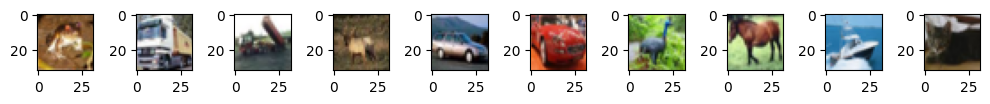

In [4]:
#Check X_train
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))

for i in range(10):
  ax = fig.add_subplot(1,10,i+1)
  ax.imshow(X_train[i])
plt.tight_layout()
plt.show()

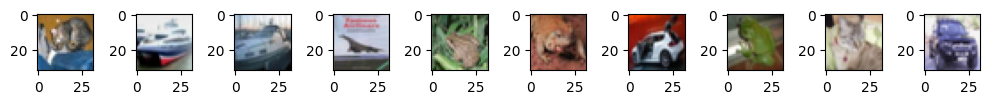

In [5]:
#Check X_test
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))

for i in range(10):
  ax = fig.add_subplot(1,10,i+1)
  ax.imshow(X_test[i])
plt.tight_layout()
plt.show()

In [6]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [7]:
# #Add channel
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [8]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
#y label Encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [11]:
num_classes = y_train.shape[1]

In [12]:
#Create Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

input_shape = (img_height, img_width, img_chaanels) = (32, 32, 3)

# **Conv layer 1개**

In [ ]:
#Conv2D layer 1
def Conv1layer_model():

  model = Sequential()
  model.add(Conv2D(16, (5,5), input_shape=input_shape)) #filters : 16 / filter 수가 output의 channel 수가 된다.
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [ ]:
model = Conv1layer_model()

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_7 (Dense)             (None, 100)               1254500   
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,256,726
Trainable params: 1,256,726
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model Compile
#compile - 훈련 환경 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 38s - loss: 1.7761 - accuracy: 0.3756 - val_loss: 1.5747 - val_accuracy: 0.4455 - 38s/epoch - 152ms/step
Epoch 2/10
250/250 - 39s - loss: 1.4687 - accuracy: 0.4860 - val_loss: 1.4822 - val_accuracy: 0.4779 - 39s/epoch - 157ms/step
Epoch 3/10
250/250 - 38s - loss: 1.3380 - accuracy: 0.5341 - val_loss: 1.4084 - val_accuracy: 0.5048 - 38s/epoch - 152ms/step
Epoch 4/10
250/250 - 38s - loss: 1.2381 - accuracy: 0.5684 - val_loss: 1.4100 - val_accuracy: 0.5126 - 38s/epoch - 153ms/step
Epoch 5/10
250/250 - 40s - loss: 1.1685 - accuracy: 0.5923 - val_loss: 1.4185 - val_accuracy: 0.5075 - 40s/epoch - 162ms/step
Epoch 6/10
250/250 - 38s - loss: 1.1053 - accuracy: 0.6139 - val_loss: 1.4338 - val_accuracy: 0.5116 - 38s/epoch - 153ms/step
Epoch 7/10
250/250 - 39s - loss: 1.0508 - accuracy: 0.6333 - val_loss: 1.4317 - val_accuracy: 0.5125 - 39s/epoch - 157ms/step
Epoch 8/10
250/250 - 38s - loss: 1.0002 - accuracy: 0.6484 - val_loss: 1.4541 - val_accuracy: 0.5097 - 38s/epoch - 153

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.5070000290870667


In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 [==============================] - 4s 13ms/step


In [ ]:
NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Pred_NAMES = [label for pred in y_pred for label in NAMES if NAMES.index(label) == pred]

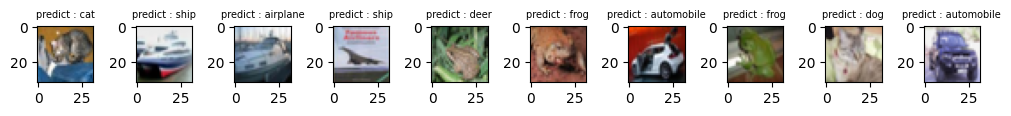

In [ ]:
#Check X_test
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))

for i in range(10):
  ax = fig.add_subplot(1,10,i+1)
  ax.imshow(X_test[i])
  ax.set_title(f'predict : {Pred_NAMES[i]}', fontdict={'fontsize':7})
plt.tight_layout()
plt.show()

array([7, 2, 1, ..., 4, 5, 6])

# Conv layer 1개 + MaxPooling

In [ ]:
#Conv2D layer 1 + pooling
def Conv1layer_pooling_model():

  model = Sequential()
  model.add(Conv2D(16, (5,5), input_shape=input_shape)) #filters : 16 / filter 수가 output의 channel 수가 된다.
  model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [ ]:
model = Conv1layer_pooling_model()

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_9 (Dense)             (None, 100)               313700    
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 315,926
Trainable params: 315,926
Non-trainable params: 0
_______________________________________________

In [ ]:
#Model Compile
#compile - 훈련 환경 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 38s - loss: 1.7100 - accuracy: 0.3965 - val_loss: 1.4852 - val_accuracy: 0.4760 - 38s/epoch - 154ms/step
Epoch 2/10
250/250 - 35s - loss: 1.3780 - accuracy: 0.5215 - val_loss: 1.3368 - val_accuracy: 0.5296 - 35s/epoch - 141ms/step
Epoch 3/10
250/250 - 38s - loss: 1.2238 - accuracy: 0.5736 - val_loss: 1.2351 - val_accuracy: 0.5636 - 38s/epoch - 153ms/step
Epoch 4/10
250/250 - 35s - loss: 1.1080 - accuracy: 0.6152 - val_loss: 1.1792 - val_accuracy: 0.5864 - 35s/epoch - 138ms/step
Epoch 5/10
250/250 - 38s - loss: 1.0088 - accuracy: 0.6496 - val_loss: 1.1515 - val_accuracy: 0.5959 - 38s/epoch - 151ms/step
Epoch 6/10
250/250 - 35s - loss: 0.9423 - accuracy: 0.6732 - val_loss: 1.1170 - val_accuracy: 0.6057 - 35s/epoch - 139ms/step
Epoch 7/10
250/250 - 35s - loss: 0.8791 - accuracy: 0.6966 - val_loss: 1.1499 - val_accuracy: 0.6038 - 35s/epoch - 139ms/step
Epoch 8/10
250/250 - 35s - loss: 0.8244 - accuracy: 0.7161 - val_loss: 1.1123 - val_accuracy: 0.6155 - 35s/epoch - 142

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.6218000054359436


# Conv layer 2개

In [ ]:
#Conv2D layer 2
def Conv2layer_model():

  model = Sequential()
  model.add(Conv2D(16, (5,5), input_shape=input_shape)) #filters : 16 / filter 수가 output의 channel 수가 된다.
  model.add(Conv2D(16, (5,5)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [ ]:
model = Conv2layer_model()

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 16)        6416      
                                                                 
 flatten_8 (Flatten)         (None, 9216)              0         
                                                                 
 dense_15 (Dense)            (None, 100)               921700    
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 930,342
Trainable params: 930,342
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model Compile
#compile - 훈련 환경 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 129s - loss: 1.8075 - accuracy: 0.3559 - val_loss: 1.6504 - val_accuracy: 0.4175 - 129s/epoch - 516ms/step
Epoch 2/10
250/250 - 121s - loss: 1.5602 - accuracy: 0.4511 - val_loss: 1.5190 - val_accuracy: 0.4643 - 121s/epoch - 485ms/step
Epoch 3/10
250/250 - 121s - loss: 1.4354 - accuracy: 0.4951 - val_loss: 1.4650 - val_accuracy: 0.4867 - 121s/epoch - 484ms/step
Epoch 4/10
250/250 - 121s - loss: 1.3428 - accuracy: 0.5284 - val_loss: 1.4125 - val_accuracy: 0.5019 - 121s/epoch - 485ms/step
Epoch 5/10
250/250 - 120s - loss: 1.2742 - accuracy: 0.5527 - val_loss: 1.4126 - val_accuracy: 0.5049 - 120s/epoch - 481ms/step
Epoch 6/10
250/250 - 121s - loss: 1.2143 - accuracy: 0.5753 - val_loss: 1.4100 - val_accuracy: 0.5054 - 121s/epoch - 485ms/step
Epoch 7/10
250/250 - 121s - loss: 1.1543 - accuracy: 0.5953 - val_loss: 1.4354 - val_accuracy: 0.5057 - 121s/epoch - 483ms/step
Epoch 8/10
250/250 - 122s - loss: 1.0860 - accuracy: 0.6204 - val_loss: 1.5062 - val_accuracy: 0.4917 - 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.4966999888420105


# Conv layer 2개 + Max pooling

In [ ]:
#Conv2D layer 2 + pooling
def Conv2layer_pooling_model():

  model = Sequential()
  model.add(Conv2D(16, (5,5), input_shape=input_shape)) #filters : 16 / filter 수가 output의 channel 수가 된다.
  model.add(Conv2D(16, (5,5)))
  model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [ ]:
model = Conv2layer_pooling_model()

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 16)        6416      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_17 (Dense)            (None, 100)               230500    
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                     

In [ ]:
#Model Compile
#compile - 훈련 환경 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 125s - loss: 1.6629 - accuracy: 0.4095 - val_loss: 1.3894 - val_accuracy: 0.5105 - 125s/epoch - 500ms/step
Epoch 2/10
250/250 - 121s - loss: 1.2746 - accuracy: 0.5524 - val_loss: 1.2035 - val_accuracy: 0.5790 - 121s/epoch - 482ms/step
Epoch 3/10
250/250 - 120s - loss: 1.0897 - accuracy: 0.6202 - val_loss: 1.1221 - val_accuracy: 0.6098 - 120s/epoch - 481ms/step
Epoch 4/10
250/250 - 120s - loss: 0.9722 - accuracy: 0.6635 - val_loss: 1.0835 - val_accuracy: 0.6235 - 120s/epoch - 481ms/step
Epoch 5/10
250/250 - 121s - loss: 0.8743 - accuracy: 0.6974 - val_loss: 1.1273 - val_accuracy: 0.6160 - 121s/epoch - 483ms/step
Epoch 6/10
250/250 - 120s - loss: 0.7931 - accuracy: 0.7252 - val_loss: 1.0681 - val_accuracy: 0.6355 - 120s/epoch - 480ms/step
Epoch 7/10
250/250 - 120s - loss: 0.7168 - accuracy: 0.7548 - val_loss: 1.0944 - val_accuracy: 0.6367 - 120s/epoch - 479ms/step
Epoch 8/10
250/250 - 120s - loss: 0.6493 - accuracy: 0.7761 - val_loss: 1.1390 - val_accuracy: 0.6315 - 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.6134999990463257


In [ ]:
#Conv2D layer 2 + pooling
def Conv2layer_pooling_model2():

  model = Sequential()
  model.add(Conv2D(16, (5,5), input_shape=input_shape)) #filters : 16 / filter 수가 output의 channel 수가 된다.
  model.add(Conv2D(8, (5,5)))
  model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [ ]:
model = Conv2layer_pooling_model2()

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 8)         3208      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1152)              0         
                                                                 
 dense_19 (Dense)            (None, 100)               115300    
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                     

In [ ]:
#Model Compile
#compile - 훈련 환경 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 107s - loss: 1.6876 - accuracy: 0.3946 - val_loss: 1.4751 - val_accuracy: 0.4764 - 107s/epoch - 429ms/step
Epoch 2/10
250/250 - 108s - loss: 1.3916 - accuracy: 0.5099 - val_loss: 1.3271 - val_accuracy: 0.5292 - 108s/epoch - 434ms/step
Epoch 3/10
250/250 - 105s - loss: 1.2355 - accuracy: 0.5649 - val_loss: 1.2492 - val_accuracy: 0.5568 - 105s/epoch - 422ms/step
Epoch 4/10
250/250 - 107s - loss: 1.1221 - accuracy: 0.6089 - val_loss: 1.1992 - val_accuracy: 0.5767 - 107s/epoch - 427ms/step
Epoch 5/10
250/250 - 106s - loss: 1.0449 - accuracy: 0.6360 - val_loss: 1.1651 - val_accuracy: 0.5950 - 106s/epoch - 423ms/step
Epoch 6/10
250/250 - 105s - loss: 0.9746 - accuracy: 0.6613 - val_loss: 1.1453 - val_accuracy: 0.6057 - 105s/epoch - 418ms/step
Epoch 7/10
250/250 - 104s - loss: 0.9166 - accuracy: 0.6822 - val_loss: 1.1459 - val_accuracy: 0.6063 - 104s/epoch - 417ms/step
Epoch 8/10
250/250 - 106s - loss: 0.8573 - accuracy: 0.7044 - val_loss: 1.1710 - val_accuracy: 0.6074 - 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.6079999804496765


In [ ]:
NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Pred_NAMES = [label for pred in y_pred for label in NAMES if NAMES.index(label) == pred]

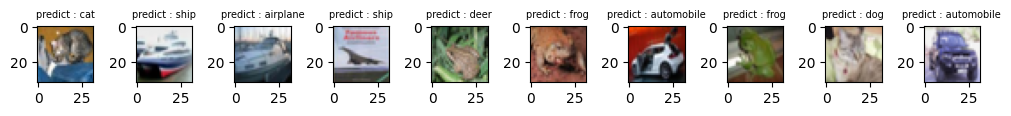

In [ ]:
#Check X_test
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))

for i in range(10):
  ax = fig.add_subplot(1,10,i+1)
  ax.imshow(X_test[i])
  ax.set_title(f'predict : {Pred_NAMES[i]}', fontdict={'fontsize':7})
plt.tight_layout()
plt.show()

# **성능 개선**

### **filter 수 늘리기**

In [15]:
#Cifar10 kaggle code 참고 1 - filter 수 늘리기 (16>32) - acc : 0.64 / 기존 filter 16 - acc : 0.61  --- 적절한 filter 수도 중요하다!!
def CNN_Model1():

  model = Sequential()
  model.add(Conv2D(32, (5,5),input_shape=input_shape)) #filter 수가 output의 channel 수가 된다.
  model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [17]:
model = CNN_Model1()

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
__________________________________________________

In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 63s - loss: 1.6364 - accuracy: 0.4235 - val_loss: 1.4314 - val_accuracy: 0.4994 - 63s/epoch - 251ms/step
Epoch 2/10
250/250 - 55s - loss: 1.3246 - accuracy: 0.5365 - val_loss: 1.2670 - val_accuracy: 0.5528 - 55s/epoch - 219ms/step
Epoch 3/10
250/250 - 50s - loss: 1.1603 - accuracy: 0.5948 - val_loss: 1.1994 - val_accuracy: 0.5752 - 50s/epoch - 200ms/step
Epoch 4/10
250/250 - 49s - loss: 1.0447 - accuracy: 0.6375 - val_loss: 1.1122 - val_accuracy: 0.6057 - 49s/epoch - 196ms/step
Epoch 5/10
250/250 - 46s - loss: 0.9524 - accuracy: 0.6703 - val_loss: 1.0706 - val_accuracy: 0.6252 - 46s/epoch - 185ms/step
Epoch 6/10
250/250 - 46s - loss: 0.8741 - accuracy: 0.6992 - val_loss: 1.0681 - val_accuracy: 0.6257 - 46s/epoch - 186ms/step
Epoch 7/10
250/250 - 47s - loss: 0.8137 - accuracy: 0.7181 - val_loss: 1.0756 - val_accuracy: 0.6315 - 47s/epoch - 189ms/step
Epoch 8/10
250/250 - 46s - loss: 0.7423 - accuracy: 0.7469 - val_loss: 1.0573 - val_accuracy: 0.6450 - 46s/epoch - 183

In [24]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.6416000127792358


### **BatchNormalization 추가**

In [25]:
#BatchNormalization layer
#학습을 안정화하는 데 사용되는 레이어
#Conv 또는 FC(Fully Connected) layer와 함께 사용되며, 입력 텐서의 각 배치에 대해 정규화를 수행한다.

#그래디언트 소실 문제 완화
#배치단위로 데이터 분포가 다를 경우 학습을 안정화 시킬 수 있음
#과적합 문제 방지

from tensorflow.keras.layers import BatchNormalization

In [26]:
#Cifar10 kaggle code 참고 2 - BatchNormalization layer 추가 0.564 헉 떨어졌다.
def CNN_Model2():

  model = Sequential()
  model.add(Conv2D(32, (5,5), input_shape=input_shape)) #filter 수가 output의 channel 수가 된다.
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [27]:
model = CNN_Model2()

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               627300    
                                                                 
 dense_3 (Dense)             (None, 10)               

In [34]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 65s - loss: 1.5881 - accuracy: 0.4517 - val_loss: 1.9197 - val_accuracy: 0.2789 - 65s/epoch - 259ms/step
Epoch 2/10
250/250 - 63s - loss: 1.2009 - accuracy: 0.5817 - val_loss: 1.9581 - val_accuracy: 0.3409 - 63s/epoch - 250ms/step
Epoch 3/10
250/250 - 63s - loss: 1.0288 - accuracy: 0.6423 - val_loss: 1.6747 - val_accuracy: 0.4984 - 63s/epoch - 254ms/step
Epoch 4/10
250/250 - 63s - loss: 0.9193 - accuracy: 0.6804 - val_loss: 1.2859 - val_accuracy: 0.5711 - 63s/epoch - 253ms/step
Epoch 5/10
250/250 - 68s - loss: 0.8301 - accuracy: 0.7123 - val_loss: 1.8152 - val_accuracy: 0.4944 - 68s/epoch - 272ms/step
Epoch 6/10
250/250 - 63s - loss: 0.7389 - accuracy: 0.7439 - val_loss: 1.2423 - val_accuracy: 0.5872 - 63s/epoch - 252ms/step
Epoch 7/10
250/250 - 77s - loss: 0.6599 - accuracy: 0.7716 - val_loss: 2.2528 - val_accuracy: 0.4532 - 77s/epoch - 307ms/step
Epoch 8/10
250/250 - 73s - loss: 0.5823 - accuracy: 0.7987 - val_loss: 1.3514 - val_accuracy: 0.6068 - 73s/epoch - 291

In [35]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.5640000104904175


### **Conv2D kernel size 변경**

In [36]:
#Cifar10 kaggle code 참고 3 - kernel 사이즈 변경 - 0.63
def CNN_Model3():

  model = Sequential()
  model.add(Conv2D(32, (3,3), input_shape=input_shape)) #filter 수가 output의 channel 수가 된다.
  model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [37]:
model = CNN_Model3()

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 40s - loss: 1.7169 - accuracy: 0.3915 - val_loss: 1.5329 - val_accuracy: 0.4625 - 40s/epoch - 161ms/step
Epoch 2/10
250/250 - 42s - loss: 1.4217 - accuracy: 0.5014 - val_loss: 1.3390 - val_accuracy: 0.5284 - 42s/epoch - 169ms/step
Epoch 3/10
250/250 - 37s - loss: 1.2628 - accuracy: 0.5592 - val_loss: 1.2493 - val_accuracy: 0.5675 - 37s/epoch - 148ms/step
Epoch 4/10
250/250 - 37s - loss: 1.1323 - accuracy: 0.6069 - val_loss: 1.1715 - val_accuracy: 0.5935 - 37s/epoch - 149ms/step
Epoch 5/10
250/250 - 39s - loss: 1.0286 - accuracy: 0.6435 - val_loss: 1.1472 - val_accuracy: 0.5993 - 39s/epoch - 155ms/step
Epoch 6/10
250/250 - 38s - loss: 0.9389 - accuracy: 0.6748 - val_loss: 1.1013 - val_accuracy: 0.6199 - 38s/epoch - 153ms/step
Epoch 7/10
250/250 - 37s - loss: 0.8648 - accuracy: 0.7027 - val_loss: 1.0948 - val_accuracy: 0.6205 - 37s/epoch - 148ms/step
Epoch 8/10
250/250 - 38s - loss: 0.7864 - accuracy: 0.7294 - val_loss: 1.0984 - val_accuracy: 0.6235 - 38s/epoch - 153

In [40]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.6313999891281128


### **Conv/Conv/Pooling**

In [41]:
#Cifar10 kaggle code 참고 0.640
def CNN_Model4():

  model = Sequential()
  model.add(Conv2D(32, (5,5), input_shape=input_shape)) #filter 수가 output의 channel 수가 된다.
  model.add(Conv2D(32, (5,5), input_shape=input_shape))
  model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [42]:
model = CNN_Model4()

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 200, verbose=2)

Epoch 1/10
250/250 - 249s - loss: 1.5887 - accuracy: 0.4355 - val_loss: 1.3204 - val_accuracy: 0.5305 - 249s/epoch - 995ms/step
Epoch 2/10
250/250 - 252s - loss: 1.1596 - accuracy: 0.5965 - val_loss: 1.1570 - val_accuracy: 0.5953 - 252s/epoch - 1s/step
Epoch 3/10
250/250 - 244s - loss: 0.9752 - accuracy: 0.6641 - val_loss: 1.0599 - val_accuracy: 0.6324 - 244s/epoch - 978ms/step
Epoch 4/10
250/250 - 241s - loss: 0.8464 - accuracy: 0.7078 - val_loss: 1.0251 - val_accuracy: 0.6478 - 241s/epoch - 966ms/step
Epoch 5/10
250/250 - 242s - loss: 0.7413 - accuracy: 0.7444 - val_loss: 1.0885 - val_accuracy: 0.6409 - 242s/epoch - 967ms/step
Epoch 6/10
250/250 - 244s - loss: 0.6416 - accuracy: 0.7796 - val_loss: 1.0851 - val_accuracy: 0.6543 - 244s/epoch - 977ms/step
Epoch 7/10
250/250 - 241s - loss: 0.5627 - accuracy: 0.8060 - val_loss: 1.1802 - val_accuracy: 0.6409 - 241s/epoch - 965ms/step
Epoch 8/10
250/250 - 237s - loss: 0.4762 - accuracy: 0.8367 - val_loss: 1.2868 - val_accuracy: 0.6345 - 237

In [45]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy : {scores[1]}')

accuracy : 0.6403999924659729
